# Data Gathering Homework

In this notebook are some exercises to gain more experience with the data gathering methods we explored in the corresponding lecture, <i>DataGathering</i>. Work through these as you see fit.

## Pandas and Data File Basics

<ol>
    <li>Load in the `adult.csv` dataset.</li>
    <li>Find the number of people in each marriage-status category.</li>
    <li>What is the average age for each sex?</li>
    <li>For salary breakdown for each salary level?</li>
    <li>Read the `pandas` docs or google to find all divorced people over 40.</li>
    <li>Read in the data from one of pudding.cool's github repository data sets <a href="https://github.com/the-pudding/data">https://github.com/the-pudding/data</a>.</li>
</ol>

## 1

In [40]:
### SPACE TO ANSWER #####
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# colnames=["workclass","age", "education", "fnlwgt", ]
adult = pd.read_csv("../Lectures/DataGathering/adult.csv", index_col=False)


In [41]:
### SPACE TO ANSWER #####

adult.tail()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,something,hours-per-week,native-country,salary
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [87]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
something         32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [101]:
pd.crosstab(adult["sex"], adult["salary"],margins=True)/adult.shape[0]

salary,<=50K,>50K,All
sex,,,
Female,0.294586,0.036209,0.330795
Male,0.464605,0.204601,0.669205
All,0.759190,0.240810,1.000000


## 2

In [42]:
### SPACE TO ANSWER #####
mar_Status = adult["marital-status"].unique()
# adult["marital-status"].head()
# plt.hist(adult["marital-status"]);
for element in mar_Status:
    number=len(adult[adult["marital-status"]==str(element)])
    print("%s:%s"%(element,number))

 Never-married:10683
 Married-civ-spouse:14976
 Divorced:4443
 Married-spouse-absent:418
 Separated:1025
 Married-AF-spouse:23
 Widowed:993


### A histogram

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text xticklabel objects>)

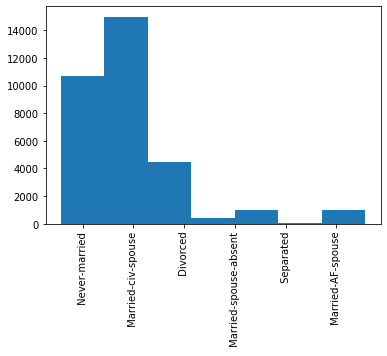

In [43]:
plt.hist(adult["marital-status"],align='left',bins=7);
plt.xticks(rotation='vertical')

## 3

In [71]:
### SPACE TO ANSWER #####
sex_list = adult["sex"].unique()
for element in sex_list:
    mean_age = adult[adult["sex"]==element]["age"].mean()
    print("%s mean age: %f"%(element,mean_age))

 Male mean age: 39.433547
 Female mean age: 36.858230


## 4

In [50]:
salary_list = adult["salary"].unique()
for element in salary_list:
    mean_age = adult[adult["salary"]==element]["age"].mean()
    print("%s mean age: %f"%(element,mean_age))

 <=50K mean age: 36.783738
 >50K mean age: 44.249841


In [64]:
salary_list = adult["salary"].unique()
for element in salary_list:
    for sex in sex_list:
        numPeop = len(adult[(adult["salary"]==element) & (adult["sex"]==sex)])
        print("%s, %s, %i"%(element,sex,numPeop))

 <=50K,  Male, 15128
 <=50K,  Female, 9592
 >50K,  Male, 6662
 >50K,  Female, 1179


### Divorced people over 40

In [85]:
# len(adult[(adult["marital-status"]==" Divorded") & (adult["age"]>40)])
# mar_Status[2]
print("Number of people over 40 that are divorced")
len(adult[(adult["marital-status"]==" Divorced")& (adult["age"]>40)])

Number of people over 40 that are divorced


2539

## Data Websites

<ol>
    <li>Find a data set at Kaggle.com, explore it with `pandas`.</li>
    <li>Explore one of the other non-Kaggle websites</li>
</ol>

## HTML Scraping With BeautifulSoup

<ol>
     <li>Write a script to get the title, author, and publishing date from the first 5 pages of articles from 538's politics section, <a href="https://fivethirtyeight.com/politics/features/">https://fivethirtyeight.com/politics/features/</a>. </li>
    <li>Write a script to get the scores from all of the Cleveland Browns games from this site, <a href="https://www.pro-football-reference.com/teams/cle/2019.htm">https://www.pro-football-reference.com/teams/cle/2019.htm</a>.</li>
    <li>Write a script to get the scores from every Cleveland Browns game from 2000 to 2019 from <a href="https://www.pro-football-reference.com/">pro-football-reference.com</a>. Store them as a csv file with columns: year, game_num, opposing_team, browns_score, opp_score</li>
    <li>Try to scrape the beer names, and beer types from the following link, <a href="https://untappd.com/w/lineage-brewing/193720/beer">https://untappd.com/w/lineage-brewing/193720/beer</a>. What happens?</li>
   
</ol>

In [4]:
#### SPACE TO ANSWER #####












In [5]:
#### SPACE TO ANSWER #####











In [6]:
#### SPACE TO ANSWER #####










In [7]:
#### SPACE TO ANSWER #####










## Python and Interacting With Databases

<ol>
    <li>Let's return to the cat_store.db database from class. Write some functions to does the following:
        <ul>
            <li>Takes in a customer id, a purchase, and a date,</li>
            <li>Record the purchase in a purchases database and assigns it a unique purchase_id,</li>
            <li>Subtracts the purchase from the products database, i.e. if someone comes in and buys 2 cat toys, the cat toy stock should go down by 2, remember that someone can't buy something if it doesn't exist.</li>
        </ul>
    </li>
    <li>You can look at the chinook.db database's layout by looking at the sqlite-sample-database-diagram-color.pdf file. Answer the following:</li>
        <ol>
            <li>Examine the tracks table. What is the most popular genre? The least popular?</li>
            <li>Write a function that takes in an ArtistId and returns a list of their tracks.</li>
        </ol>
</ol>

In [8]:
#### SPACE TO ANSWER #####










In [9]:
#### SPACE TO ANSWER #####










In [10]:
#### SPACE TO ANSWER #####










In [11]:
#### SPACE TO ANSWER #####










In [12]:
#### SPACE TO ANSWER #####










## Python API Wrappers

<ol>
    <li>Work through the Python Wrappers for APIs.</li>
    <li>Using `praw` scrape the top ten "hot" posts from your favorite subreddit.</li>
    <li>Using `praw` learn about <i>CommentForest</i>, so you are able to extract all of the comments and subcomments from a post.</li>
    <li>Look at the documentation for `Spotipy` <a href="https://spotipy.readthedocs.io/en/2.6.1/#">https://spotipy.readthedocs.io/en/2.6.1/#</a>.</li>
    <li>Find the top ten songs for the Red Hot Chilli Peppers using `Spotipy`</li>
</ol>

In [10]:
#### SPACE TO ANSWER #####










In [10]:
#### SPACE TO ANSWER #####










In [10]:
#### SPACE TO ANSWER #####










In [10]:
#### SPACE TO ANSWER #####










In [10]:
#### SPACE TO ANSWER #####








